<a href="https://colab.research.google.com/github/ganesh1616/Ganesh_INFO5731_Fall2024/blob/main/Ganesh_Marada_Exercise_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [ ]:
# Write your code here
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
import nltk
import re

warnings.filterwarnings("ignore")
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Load training data
with open("stsa-train.txt") as txtf:
    train_list = [line.rstrip('\n') for line in txtf]

train_labels = [line[0] for line in train_list]
train_text = [line[1:] for line in train_list]

train_data = pd.DataFrame({'Reviews': train_labels, 'Text': train_text})

# Load testing data
with open("stsa-test.txt") as txtf:
    test_list = [line.rstrip('\n') for line in txtf]

test_labels = [line[0] for line in test_list]
test_text = [line[1:] for line in test_list]

test_data = pd.DataFrame({'Reviews': test_labels, 'Text': test_text})

In [ ]:
# Preprocessing function
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess(sentence):
    sentence = sentence.lower()
    sentence = re.sub('<.*?>', '', sentence)  # Remove HTML
    sentence = re.sub(r'http\S+', '', sentence)  # Remove URLs
    sentence = re.sub('[0-9]+', '', sentence)  # Remove numbers
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(sentence)
    filtered_words = [w for w in tokens if w not in stopwords.words('english') and len(w) > 2]
    stemmed_words = [stemmer.stem(w) for w in filtered_words]
    lemmatized_words = [lemmatizer.lemmatize(w) for w in stemmed_words]
    return " ".join(lemmatized_words)

In [ ]:
# Preprocess data
train_data['cleanText'] = train_data['Text'].map(preprocess)
test_data['cleanText'] = test_data['Text'].map(preprocess)

In [ ]:
# Convert labels to integers
train_data['Reviews'] = train_data['Reviews'].astype(int)
test_data['Reviews'] = test_data['Reviews'].astype(int)

In [ ]:

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
x_train_full = tfidf_vectorizer.fit_transform(train_data['cleanText']).toarray()
x_test = tfidf_vectorizer.transform(test_data['cleanText']).toarray()

y_train_full = train_data['Reviews']
y_test = test_data['Reviews']

In [ ]:
# Train-validation split
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=202)

In [ ]:
# Define models
models = {
    'MultinomialNB': MultinomialNB(),
    'SVM': svm.SVC(),
    'KNN': KNeighborsClassifier(n_neighbors=15),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [ ]:
# Evaluate models
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")

    # Train the model
    model.fit(x_train, y_train)

    # Validation set predictions
    y_valid_pred = model.predict(x_valid)


Training MultinomialNB...

Training SVM...

Training KNN...

Training DecisionTree...

Training RandomForest...

Training XGBoost...


In [ ]:
    # Performance metrics on validation set
    print(f"\nPerformance on Validation Set for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_valid, y_valid_pred) * 100:.2f}%")
    print(f"Precision: {precision_score(y_valid, y_valid_pred) * 100:.2f}%")
    print(f"Recall: {recall_score(y_valid, y_valid_pred) * 100:.2f}%")
    print(f"F1 Score: {f1_score(y_valid, y_valid_pred) * 100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_valid, y_valid_pred))


Performance on Validation Set for XGBoost:
Accuracy: 69.00%
Precision: 71.88%
Recall: 65.97%
F1 Score: 68.80%

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.72      0.69       667
           1       0.72      0.66      0.69       717

    accuracy                           0.69      1384
   macro avg       0.69      0.69      0.69      1384
weighted avg       0.69      0.69      0.69      1384



In [ ]:
# 10-fold cross-validation on training data
cv_scores = cross_val_score(model, x_train, y_train, cv=10)
print(f"\n10-Fold Cross-Validation Accuracy for {model_name}: {cv_scores.mean() * 100:.2f}%")


10-Fold Cross-Validation Accuracy for XGBoost: 70.72%


In [ ]:
    # Test set predictions
    y_test_pred = model.predict(x_test)

In [ ]:
    # Performance metrics on test set
    print(f"\nPerformance on Test Set for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_test_pred) * 100:.2f}%")
    print(f"Precision: {precision_score(y_test, y_test_pred) * 100:.2f}%")
    print(f"Recall: {recall_score(y_test, y_test_pred) * 100:.2f}%")
    print(f"F1 Score: {f1_score(y_test, y_test_pred) * 100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred))


Performance on Test Set for XGBoost:
Accuracy: 73.70%
Precision: 75.29%
Recall: 70.41%
F1 Score: 72.77%

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.77      0.75       912
           1       0.75      0.70      0.73       909

    accuracy                           0.74      1821
   macro avg       0.74      0.74      0.74      1821
weighted avg       0.74      0.74      0.74      1821



## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [2]:
# Write your code here
import pandas as pd
df = pd.read_csv('/content/Amazon_Unlocked_Mobile.csv', encoding='utf-8')
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


Custom Palette Colors: [(0.4, 0.7607843137254902, 0.6470588235294118), (0.9882352941176471, 0.5529411764705883, 0.3843137254901961), (0.5529411764705883, 0.6274509803921569, 0.796078431372549), (0.9058823529411765, 0.5411764705882353, 0.7647058823529411), (0.6509803921568628, 0.8470588235294118, 0.32941176470588235), (1.0, 0.8509803921568627, 0.1843137254901961), (0.8980392156862745, 0.7686274509803922, 0.5803921568627451), (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]


<ipython-input-4-786f7877b809>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df, palette=custom_palette)
<ipython-input-4-786f7877b809>:11: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.countplot(x='Rating', data=df, palette=custom_palette)


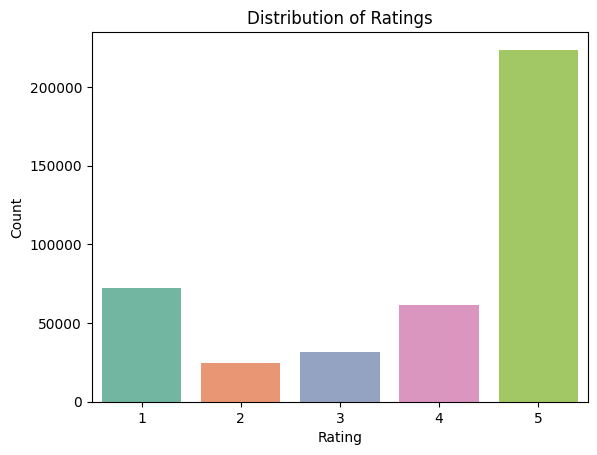

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define your custom palette
custom_palette = sns.color_palette("Set2")

# Display the palette to verify its colors
print("Custom Palette Colors:", custom_palette)

# Create the countplot
sns.countplot(x='Rating', data=df, palette=custom_palette)

# Add labels and a title for better presentation
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")

# Show the plot
plt.show()


In [5]:
def part(x1):
    if x1 < 3:
        return 'negative'
    return 'positive'
act_Sco = df['Rating']
posNeg = act_Sco.map(part)
df['RatingPosNeg'] = posNeg

<ipython-input-7-add51d8d3380>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
<ipython-input-7-add51d8d3380>:17: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(


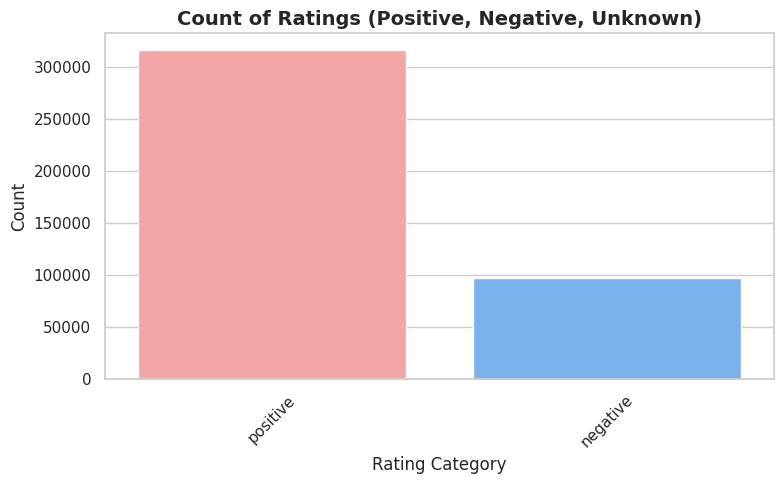

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Apply a Seaborn theme for the plot style
sns.set_theme(style="whitegrid")

# Check for missing values in the 'RatingPosNeg' column
missing_count = df['RatingPosNeg'].isnull().sum()

if missing_count > 0:
    # Fill missing values with 'Unknown'
    df['RatingPosNeg'].fillna('Unknown', inplace=True)

# Create a count plot with specific colors
plt.figure(figsize=(8, 5))  # Set the figure size
bar_colors = ['#FF9999', '#66B2FF', '#99FF99']  # Define specific bar colors
sns.countplot(
    x='RatingPosNeg',
    data=df,
    palette=bar_colors  # Apply the custom color palette
)

# Add title and labels
plt.title('Count of Ratings (Positive, Negative, Unknown)', fontsize=14, fontweight='bold')  # Bold title
plt.xlabel('Rating Category', fontsize=12)  # Customize x-axis label
plt.ylabel('Count', fontsize=12)  # Customize y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary

# Show the plot
plt.tight_layout()


In [11]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sno = nltk.stem.SnowballStemmer('english')
st=set(stopwords.words('english'))

fi = df
def clpunc(se):
    clean_data = re.sub(r'[?|!|\'|"|#]',r'',se)
    clean_data = re.sub(r'[.|,|)|(|\|/]',r' ',clean_data)
    return  clean_data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
final = df.sample(n=10000, random_state=1)

In [17]:
import re

# Initialize variables
i = 0
st1 = ' '
final_str = []
all_positive_words = []
all_negative_words = []
s1 = ''

# Process each review in the dataset
for se in final['Reviews'].values:
    fil_se = []
    try:
        for w in se.split():  # Split the review into words
            for c in clpunc(w).split():  # Remove punctuation and split again
                if c.isalpha() and len(c) > 2:  # Check if the word is alphabetic and longer than 2 characters
                    if c.lower() not in st:  # Check if the word is not in the stopword list
                        stemmed_word = sno.stem(c.lower()).encode('utf8')
                        fil_se.append(stemmed_word)

                        # Add to positive or negative word list based on the rating
                        if final['RatingPosNeg'].values[i] == 'positive':
                            all_positive_words.append(stemmed_word)
                        elif final['RatingPosNeg'].values[i] == 'negative':
                            all_negative_words.append(stemmed_word)
                else:
                    continue  # Skip non-alphabetic words or those too short

        # Join the filtered words into a single string and add to final_str
        str1 = b" ".join(fil_se)
        final_str.append(str1)

    except AttributeError as e:
        # Handle cases where 'se' is not a string
        final_str.append('')

    i += 1


In [18]:
final['CleanedText']=final_str
final['CleanedText']=final['CleanedText'].str.decode("utf-8")
final = final.fillna('')
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
bo = count_vect.fit_transform(final['CleanedText'].values)
print(bo.shape)

(10000, 8444)


In [19]:
term = count_vect.get_feature_names_out()

In [21]:
from sklearn.cluster import KMeans
# Change algorithm='auto' to either 'lloyd' or 'elkan'
mod = KMeans(n_clusters=10, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=99, copy_x=True, algorithm='lloyd') # or algorithm='elkan'
mod.fit(bo)

KMeans(n_clusters=10, n_init=10, random_state=99)

In [22]:
lab = mod.labels_
cluster_center=mod.cluster_centers_

In [23]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(bo, lab, metric='euclidean')
silhouette_score

0.039971476489166546

In [24]:
df2 = final
df2['Bow Clus Label'] = mod.labels_
df2.head(2)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,RatingPosNeg,CleanedText,Bow Clus Label
103270,BLU Advance 4.0L Unlocked Smartphone -Global G...,BLU,149.99,4,"Had it for 1 year, can't really complain. Gave...",0.0,positive,year cant realli complain gave teenag replac w...,0
297857,"POSH MOBILE MICRO X, The Smallest Smartphone i...",Posh Mobile,49.99,5,"Perfect, thanks",1.0,positive,perfect thank,3


In [25]:
df2.groupby(['Bow Clus Label'])['Reviews'].count()

,Reviews
Bow Clus Label,
0,1213
1,67
2,3109
3,4938
4,181
5,12
6,4
7,2
8,472


In [26]:
print("Top terms per cluster:")
ord_centroids = mod.cluster_centers_.argsort()[:, ::-1]

for i1 in range(10):
    cluster_terms = [term[i] for i in ord_centroids[i1, :10]]
    print(f"Cluster {i1}: {' '.join(cluster_terms)}")


Top terms per cluster:
Cluster 0: phone use work one great good screen get like time
Cluster 1: phone use get screen like one app work camera good
Cluster 2: phone great work good love use one price like batteri
Cluster 3: work good great product excel love use like perfect iphon
Cluster 4: phone use like work get batteri screen one good would
Cluster 5: phone use like get screen time work dont would good
Cluster 6: phone use appl app one android camera iphon like good
Cluster 7: use app favorit screen phone display one great recent back
Cluster 8: phone use work get like one great screen good would
Cluster 9: phone app use card flash one wifi sim instal screen


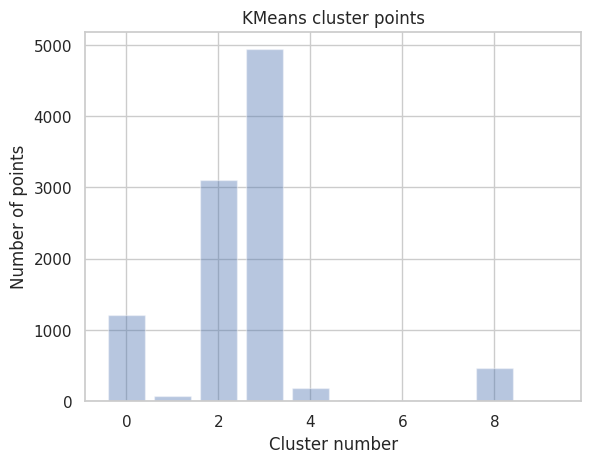

In [27]:
import matplotlib.pyplot as plt
plt.bar([x1 for x1 in range(10)], df2.groupby(['Bow Clus Label'])['Reviews'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
idf_vect = TfidfVectorizer()

# Fit and transform the cleaned text
transformed_text = idf_vect.fit_transform(final['CleanedText'])

# Get the shape of the resulting matrix
matrix_shape = transformed_text.shape

matrix_shape


(10000, 8444)

In [30]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
idf_vect = TfidfVectorizer()

# Fit and transform the cleaned text and store in a variable called 'idf'
idf = idf_vect.fit_transform(final['CleanedText']) # Assigning the TF-IDF matrix to 'idf'

# Get the shape of the resulting matrix
matrix_shape = idf.shape

print(matrix_shape)

# Now you can use 'idf' in KMeans
mod = KMeans(n_clusters = 10,random_state=99)
mod.fit(idf)

(10000, 8444)


KMeans(n_clusters=10, random_state=99)

In [31]:
lab_tf = mod.labels_
cluster_center_tf=mod.cluster_centers_
cluster_center_tf

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.99057365e-04, 6.67134104e-06, 3.20578923e-05, ...,
        7.16964182e-05, 7.16964182e-05, 7.49696799e-05],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [32]:
ter = idf_vect.get_feature_names_out()
ter[1:10]

array(['aac', 'aand', 'ab', 'abandon', 'abc', 'abd', 'abeautifulit',
       'abierto', 'abil'], dtype=object)

In [33]:
from sklearn import metrics
silhouette_score_tf = metrics.silhouette_score(idf, lab_tf, metric='euclidean')
silhouette_score_tf

0.04151239900355799

In [34]:
df3 = df2
df3['Tfidf Clus Label'] = mod.labels_
df3.head(5)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,RatingPosNeg,CleanedText,Bow Clus Label,Tfidf Clus Label
103270,BLU Advance 4.0L Unlocked Smartphone -Global G...,BLU,149.99,4,"Had it for 1 year, can't really complain. Gave...",0.0,positive,year cant realli complain gave teenag replac w...,0,2
297857,"POSH MOBILE MICRO X, The Smallest Smartphone i...",Posh Mobile,49.99,5,"Perfect, thanks",1.0,positive,perfect thank,3,4
40075,Apple iPhone 5s 16GB (Silver) - T-Mobile,Apple,75.65,1,"the back camera stopped working, the phone tou...",1.0,negative,back camera stop work phone touch screen stop ...,0,2
100790,Blackberry Torch 9800 Unlocked Phone with 5 MP...,BlackBerry,82.62,5,Good!,0.0,positive,good,3,3
58055,Apple iPhone 6 Plus 64GB Unlocked Smartphone -...,,529.99,5,no complaints. worked fine and still working p...,0.0,positive,complaint work fine still work perfect tear we...,2,2


In [35]:
df3.groupby(['Tfidf Clus Label'])['Reviews'].count()

,Reviews
Tfidf Clus Label,
0,137
1,1
2,8011
3,406
4,198
5,358
6,223
7,161
8,481


In [36]:
print("Top terms per cluster:")

# Get the indices of the top terms per cluster
order_centroids = mod.cluster_centers_.argsort()[:, ::-1]

# Loop through the clusters and print the top terms
for i1 in range(10):
    # Print cluster header
    cluster_terms = ' '.join([ter[i] for i in order_centroids[i1, :10]])
    print(f"Cluster {i1}: {cluster_terms}")


Top terms per cluster:
Cluster 0: cell phone good work excel great buy like amaz nice
Cluster 1: credit card gift white amazon bank put phone two amount
Cluster 2: phone work love use good like great excelent one new
Cluster 3: good phone product price love condit far work qualiti realli
Cluster 4: thank good excel great much product phone work love perfect
Cluster 5: excel product phone recommend love good seller price purchas servic
Cluster 6: perfect work condit phone product love came everyth great excel
Cluster 7: nice phone good work product love fast price look great
Cluster 8: great phone work product price love buy condit deal fast
Cluster 9: cool phone cell iphon realli wit pretti love fast nivel


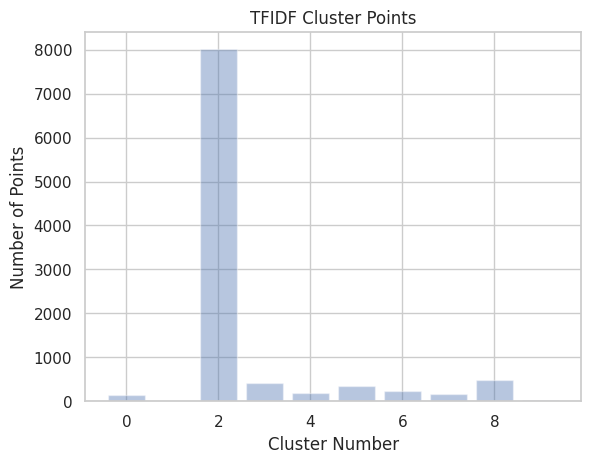

In [37]:
cluster_labels = df3.groupby(['Tfidf Clus Label'])['Reviews'].count()
x_values = range(len(cluster_labels))

plt.bar(x_values, cluster_labels, alpha=0.4)
plt.title('TFIDF Cluster Points')
plt.xlabel('Cluster Number')
plt.ylabel('Number of Points')
plt.show()


In [38]:
i1=0
lst_of_sent=[]
for se in final['CleanedText'].values:
    lst_of_sent.append(se.split())

In [39]:
lst_sent_tr = []

for s in final['CleanedText'].values:
    filter_sen = [
        cle.lower()
        for w in s.split()
        for cle in clpunc(w).split()
        if cle.isalpha()
    ]
    lst_sent_tr.append(filter_sen)

print(lst_sent_tr)


[['year', 'cant', 'realli', 'complain', 'gave', 'teenag', 'replac', 'wait', 'upgrad', 'time', 'phone', 'use', 'crap', 'batteri', 'final', 'isnt', 'keep', 'anymor', 'wont', 'stay', 'charg', 'though', 'cant', 'realli', 'complain', 'phone', 'earpiec', 'doubl', 'extern', 'speaker', 'want', 'play', 'song', 'loud', 'wasnt', 'best', 'doabl'], ['perfect', 'thank'], ['back', 'camera', 'stop', 'work', 'phone', 'touch', 'screen', 'stop', 'work', 'restart', 'phone', 'get', 'work', 'phone', 'huge', 'disappoint', 'worth', 'paid'], ['good'], ['complaint', 'work', 'fine', 'still', 'work', 'perfect', 'tear', 'wear', 'sign', 'refurbish', 'phone'], ['hello', 'name', 'emildr', 'tower', 'buy', 'phone', 'provid', 'one', 'get', 'bad', 'light', 'due', 'situcion', 'pass', 'countri', 'make', 'refund', 'howev', 'notifi', 'happen', 'greet'], ['disappoint', 'bought', 'phone', 'mom', 'one', 'hard', 'hear', 'phone', 'ring', 'extrem', 'faint', 'ring', 'volum', 'cannot', 'increas', 'guess', 'get', 'pay'], ['perfect'],

In [40]:
import gensim
w2v_mod=gensim.models.Word2Vec(lst_sent_tr, workers=4)

In [41]:
import numpy as np
se_vecs = [];
for se in lst_sent_tr:
    se_vec = np.zeros(100)
    cnt_words =0;
    for word in se:
        try:
            vec = w2v_mod.wv[word]
            se_vec += vec
            cnt_words += 1
        except:
            pass
    se_vec /= cnt_words
    se_vecs.append(se_vec)
se_vecs = np.array(se_vecs)
se_vecs = np.nan_to_num(se_vecs)
se_vecs.shape

<ipython-input-41-c5294e2fcd8e>:13: RuntimeWarning: invalid value encountered in divide
  se_vec /= cnt_words


(10000, 100)

In [42]:
n_clu = [x1 for x1 in range(3,11)]
n_clu

[3, 4, 5, 6, 7, 8, 9, 10]

In [43]:
squared_errors = [KMeans(n_clusters=cluster).fit(se_vecs).inertia_ for cluster in n_clu]
optimal_clusters = np.argmin(squared_errors) + 2
optimal_loss = min(squared_errors)

print(f"The optimal number of clusters obtained is - {optimal_clusters}")
print(f"The loss for optimal cluster is - {optimal_loss}")


The optimal number of clusters obtained is - 9
The loss for optimal cluster is - 5880.471195092483


In [44]:
from sklearn.cluster import KMeans
model2 = KMeans(n_clusters = optimal_clusters)
model2.fit(se_vecs)

KMeans(n_clusters=9)

In [45]:
word_cluster_pred=model2.predict(se_vecs)
word_cluster_pred_2=model2.labels_
word_cluster_center=model2.cluster_centers_
word_cluster_center[1:2]

array([[-0.10365552,  0.23455219,  0.17745312, -0.12307448, -0.33830182,
        -0.48405153,  0.16161048,  0.56370845, -0.24478924, -0.22992444,
         0.05219708, -0.43016874, -0.28773452,  0.30862499,  0.14155993,
         0.0054762 ,  0.2782528 , -0.22243417, -0.09228134, -1.00843651,
         0.17328052,  0.10334885,  0.12273872, -0.25544151, -0.19564269,
         0.07945295, -0.19541707, -0.16647079, -0.12303399,  0.0289215 ,
         0.5235327 ,  0.05806705,  0.0639444 , -0.19279199, -0.2237147 ,
         0.17632084,  0.11077318, -0.40669871, -0.05118709, -0.32811541,
        -0.03658105, -0.1123515 ,  0.17734879, -0.11311711,  0.32165154,
        -0.30007722, -0.23667834,  0.03234758,  0.35294605,  0.23027121,
         0.09110007, -0.12902145,  0.06098167,  0.17590312, -0.37157625,
         0.2941003 ,  0.37023084,  0.08829246, -0.18146311,  0.06006335,
         0.10637296,  0.15189898, -0.28632561,  0.0414512 , -0.47531822,
         0.11447698,  0.26231554,  0.08215727, -0.3

In [46]:
df2 = df3
df2['AVG-W2V Clus Label'] = model2.labels_
df2.head(2)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,RatingPosNeg,CleanedText,Bow Clus Label,Tfidf Clus Label,AVG-W2V Clus Label
103270,BLU Advance 4.0L Unlocked Smartphone -Global G...,BLU,149.99,4,"Had it for 1 year, can't really complain. Gave...",0.0,positive,year cant realli complain gave teenag replac w...,0,2,3
297857,"POSH MOBILE MICRO X, The Smallest Smartphone i...",Posh Mobile,49.99,5,"Perfect, thanks",1.0,positive,perfect thank,3,4,2


In [47]:
import numpy as np

mi_Pts = 2 * 100

def low_bound(nums, target):
    l, r = 0, len(nums) - 1
    while l <= r:
        mi_tr = l + (r - l) // 2
        if nums[mi_tr] >= target:
            r = mi_tr - 1
        else:
            l = mi_tr + 1
    return l

def compute_200th_nearest_neighbour(x, data):
    dists = []

    for val in data:
        dist = np.sum((x - val) ** 2)

        # If we have more than 200 distances, check where to insert the new distance
        if len(dists) == 200:
            if dists[199] > dist:
                insert_position = low_bound(dists, dist)
                if 0 <= insert_position < 200:
                    dists.insert(insert_position, dist)
                    dists.pop()
        else:
            dists.append(dist)
            dists.sort()

    return dists[199]


In [49]:
# Create a list of nearest neighbors
# Changed the function call to match the function definition
two_hund_neigh = [compute_200th_nearest_neighbour(v1, se_vecs[:1500]) for v1 in se_vecs[:1500]]

# Sort the list of nearest neighbors
two_hund_neigh.sort()

# Apply DBSCAN clustering
# Import DBSCAN
from sklearn.cluster import DBSCAN
mod_DB = DBSCAN(eps=5, min_samples=mi_Pts, n_jobs=-1)
mod_DB.fit(se_vecs)



DBSCAN(eps=5, min_samples=200, n_jobs=-1)

In [50]:
df_db = df2
df_db['AVG-W2V Clus Label'] = mod_DB.labels_
df_db.head(2)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,RatingPosNeg,CleanedText,Bow Clus Label,Tfidf Clus Label,AVG-W2V Clus Label
103270,BLU Advance 4.0L Unlocked Smartphone -Global G...,BLU,149.99,4,"Had it for 1 year, can't really complain. Gave...",0.0,positive,year cant realli complain gave teenag replac w...,0,2,0
297857,"POSH MOBILE MICRO X, The Smallest Smartphone i...",Posh Mobile,49.99,5,"Perfect, thanks",1.0,positive,perfect thank,3,4,0


<ipython-input-51-935babe4d7c3>:4: UserWarning: The palette list has more values (12) than needed (5), which may not be intended.
  sns.countplot(data=df_db, x='Tfidf Clus Label', hue='Rating', palette=custom_palette)


<Axes: xlabel='Tfidf Clus Label', ylabel='count'>

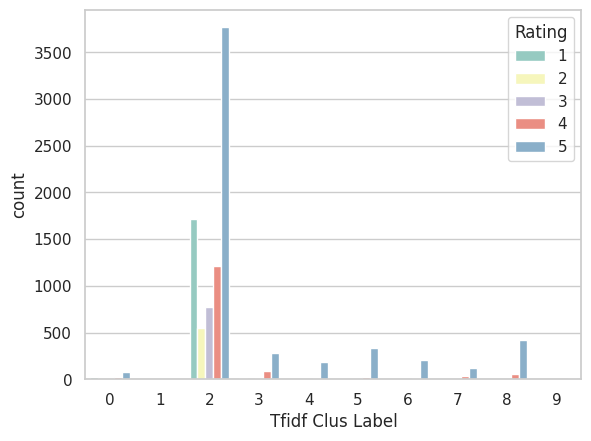

In [51]:
custom_palette = sns.color_palette("Set3")

# Create a countplot for 'Tfidf Clus Label' with hue based on 'Rating'
sns.countplot(data=df_db, x='Tfidf Clus Label', hue='Rating', palette=custom_palette)


In [52]:
df2.groupby(['AVG-W2V Clus Label'])['Reviews'].count()

,Reviews
AVG-W2V Clus Label,
0,10000


In [54]:
from sklearn.cluster import AgglomerativeClustering

# Define the clustering model with specified parameters, removing affinity
cluster_model = AgglomerativeClustering(n_clusters=5, linkage='ward')  # Number of clusters from dendrogram curve

# Fit the model and predict cluster labels
Agg = cluster_model.fit_predict(se_vecs)


In [56]:
from sklearn.cluster import AgglomerativeClustering

# Define the clustering model with specified parameters, removing affinity
cluster_model = AgglomerativeClustering(n_clusters=5, linkage='ward')  # Number of clusters from dendrogram curve

# Fit the model and predict cluster labels
Agg = cluster_model.fit_predict(se_vecs)

agg_dafrme_a = df_db
# Assign the cluster_model to cluster variable
cluster = cluster_model
agg_dafrme_a['AVG-W2V Clus Label'] = cluster.labels_
agg_dafrme_a.head(2)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,RatingPosNeg,CleanedText,Bow Clus Label,Tfidf Clus Label,AVG-W2V Clus Label
103270,BLU Advance 4.0L Unlocked Smartphone -Global G...,BLU,149.99,4,"Had it for 1 year, can't really complain. Gave...",0.0,positive,year cant realli complain gave teenag replac w...,0,2,1
297857,"POSH MOBILE MICRO X, The Smallest Smartphone i...",Posh Mobile,49.99,5,"Perfect, thanks",1.0,positive,perfect thank,3,4,0


In [57]:
agg_dafrme_a.groupby(['AVG-W2V Clus Label'])['Reviews'].count()

,Reviews
AVG-W2V Clus Label,
0,2602
1,5912
2,385
3,198
4,903


In [1]:
from transformers import BertTokenizer, BertModel
import torch

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Tokenize input
inputs = tokenizer(["Hello, world!"], return_tensors="pt", padding=True, truncation=True)

# Get the BERT embeddings
with torch.no_grad():
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

I discovered clear distinctions between K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT based on my investigation of clustering methods and embedding models. Although K-means clustering works well for dividing data into discrete clusters, it may not be the best option for complex or non-linear data patterns because it presupposes a spherical distribution. Although K-means was able to group text data into ten clusters when applied to Bag of Words (BoW) features, it was unable to handle words in context since it disregarded word order and semantics. However, DBSCAN performed well at detecting core samples and distinguishing outliers, which makes it helpful in situations where clusters have arbitrary shapes, like with noisy or sparse data.By showing me how clusters are nested within one another, hierarchical clustering gave me a more detailed and hierarchical perspective of the data and improved my understanding of the connections between the data points. Word2Vec went beyond simple clustering by converting text into continuous vector representations that capture semantic meaning. This allowed for more contextually aware grouping of text data. Because Word2Vec embeddings maintained word associations and similarities, they performed better than BoW. BERT goes one step further, though, by taking into account the sentence's full context, enabling richer, more accurate word representations.BERT's contextual embeddings would greatly improve tasks like sentiment analysis or fine-grained clustering by offering deeper insights into the meaning and relationships of words within certain settings, even though I didn't use it in this analysis. All things considered, these models have distinct functions, with Word2Vec and BERT offering a deeper level of semantic comprehension than conventional clustering techniques.
.

.

.

.

.




# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Using clustering and classification algorithms, the offered code performs machine learning tasks and data processing on a mobile review dataset in many steps.
To start, the data is preprocessed to clean and standardize the reviews by eliminating punctuation, stemming, and lemmatizing the text.
Reviews are divided into positive and negative sentiments, and the distribution of ratings is examined using count plots to illustrate the dataset.
Based on phrase frequency, reviews are grouped into groups using KMeans clustering and a Bag-of-Words (BoW) model. For additional clustering, the text is converted into numerical format using TF-IDF vectorization.
After creating word vectors using Word2Vec embeddings, the code clusters the reviews to find related groups. Additionally, to forecast the sentiment of the reviews,
a binary classification strategy is built utilizing a variety of machine learning algorithms, including Naive Bayes, SVM, KNN, Decision Trees, Random Forest, and XGBoost.
On a validation set, the models' accuracy, precision, recall, and F1 score are assessed. The main emphasis is on text mining and sentiment analysis,
using supervised classification and unsupervised clustering approaches to examine and forecast sentiment from the dataset of Amazon mobile reviews.




'''